##### * Importing some useful libraries

In [ ]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
import time # calculate time

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud
!pip install selenium
from bs4 import BeautifulSoup # use for scraping the data from website
from selenium import webdriver # use for automation chrome
import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model

import warnings # ignores pink warnings
warnings.filterwarnings('ignore')


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
phish_data = pd.read_csv('phishing_site_urls.csv') # Reading the CSV file containing phishing site URLs into a pandas DataFrame

In [ ]:
phish_data.head() #it displays the first few rows of the DataFrame phish_data, providing a quick preview of the dataset.

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [ ]:
phish_data.tail() #it displays the last few rows of the DataFrame phish_data, allowing you to quickly view the end of the dataset.

,URL,Label
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad
549345,apple-search.info,bad


In [ ]:
phish_data.info() #it provides a summary of the DataFrame phish_data, including its structure and basic statistics about its columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


* **About dataset**
* Data is containg 5,49,346 unique entries.
* There are two columns.
* Label column is prediction col which has 2 categories
    A. Good - which means the urls is not containing malicious stuff and **this site is not a Phishing Site.**
    B. Bad - which means the urls contains malicious stuffs and **this site isa Phishing Site.**
* There is no missing value in the dataset.

In [ ]:
phish_data.isnull().sum() # there is no missing values

URL      0
Label    0
dtype: int64

In [ ]:
#create a dataframe of classes counts
label_counts = pd.DataFrame(phish_data.Label.value_counts())

### Preprocessing

#### RegexpTokenizer
* A tokenizer that splits a string using a regular expression, which matches either the tokens or the separators between tokens.

In [ ]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

#This line of code creates a tokenizer object using a regular expression pattern [A-Za-z]+, which tokenizes text by extracting sequences of alphabetic characters (both uppercase and lowercase).


In [ ]:
phish_data.URL[0] #itretrieves the value of the 'URL' column from the first row of the DataFrame phish_data.

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [ ]:
# this will be pull letter which matches to expression
tokenizer.tokenize(phish_data.URL[0]) # using first row

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [ ]:
print('Getting words tokenized ...') #it simply prints a message indicating that the process of tokenization is being initiated.
t0= time.perf_counter() #it records the current time before starting the tokenization process. It uses time.perf_counter() to measure time intervals.
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0 #it calculates the time taken for the tokenization process by subtracting the start time (t0) from the current time and storing the result in the variable t1.
print('Time taken',t1 ,'sec') #it prints the time taken for the tokenization process in seconds.

Getting words tokenized ...
Time taken 3.269386799998756 sec


In [ ]:
phish_data.sample(5)

,URL,Label,text_tokenized
117992,sell4u.ca/paypal/login/cf8bb50734/home,bad,"[sell, u, ca, paypal, login, cf, bb, home]"
74167,www.erlang.org/course/exercises.html#dialog,good,"[www, erlang, org, course, exercises, html, di..."
25687,paypal.com.us.cgi-bin.webscr.cmd.login-run.588...,bad,"[paypal, com, us, cgi, bin, webscr, cmd, login..."
235478,robertcoker.com/,good,"[robertcoker, com]"
363090,intotheboards.net/hockey2/publish/evansville/I...,good,"[intotheboards, net, hockey, publish, evansvil..."


#### SnowballStemmer
* Snowball is a small string processing language, gives root words

#This code randomly selects 5 rows from the DataFrame phish_data and displays them. It's a way to get a random sample of the dataset for examination.








In [ ]:
stemmer = SnowballStemmer("english") # choose a language

In [ ]:
print('Getting words stemmed ...') #it prints a message indicating that the process of stemming is being initiated.
t0= time.perf_counter() #the current time is recorded before starting the stemming process using time.perf_counter().
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l]) #
t1= time.perf_counter() - t0 #it calculates the time taken for the stemming process by subtracting the start time (t0) from the current time and storing the result in the variable t1.
print('Time taken',t1 ,'sec') # it prints the time taken for the stemming process in seconds.

Getting words stemmed ...
Time taken 89.50528070000291 sec


In [ ]:
phish_data.sample(5) #it randomly selects 5 rows from the DataFrame phish_data and displays them. It's a way to get a random sample of the dataset for examination.

,URL,Label,text_tokenized,text_stemmed
104036,oilchangeasheville.com/tmp/https://www2.Santan...,bad,"[oilchangeasheville, com, tmp, https, www, San...","[oilchangeashevill, com, tmp, https, www, sant..."
273800,amazon.com/About-Alice-Calvin-Trillin/dp/14000...,good,"[amazon, com, About, Alice, Calvin, Trillin, dp]","[amazon, com, about, alic, calvin, trillin, dp]"
509339,dingparmyrol.com/zapoy/gate.php,bad,"[dingparmyrol, com, zapoy, gate, php]","[dingparmyrol, com, zapoy, gate, php]"
22077,'www.rdsw.cn/user/?us.battle.net/login/en/?ref...,bad,"[www, rdsw, cn, user, us, battle, net, login, ...","[www, rdsw, cn, user, us, battl, net, login, e..."
465689,wordiq.com/definition/Fasti,good,"[wordiq, com, definition, Fasti]","[wordiq, com, definit, fasti]"


In [ ]:
print('Getting joiningwords ...') #it prints a message indicating that the process of joining words is being initiated.
t0= time.perf_counter() #Here, the current time is recorded before starting the process using time.perf_counter().
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l)) #
t1= time.perf_counter() - t0 #it calculates the time taken for the joining process by subtracting the start time (t0) from the current time and storing the result in the variable t1.
print('Time taken',t1 ,'sec') #it prints the time taken for the joining process in seconds.

Getting joiningwords ...
Time taken 0.38347049999720184 sec


#This code randomly selects 5 rows from the DataFrame phish_data and displays them. It provides a way to examine a random subset of the dataset.








In [ ]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
215422,mountzionsite.com/religion_2/rev_selau_toilolo...,good,"[mountzionsite, com, religion, rev, selau, toi...","[mountzionsit, com, religion, rev, selau, toil...",mountzionsit com religion rev selau toilolo html
431649,skatterandsnug.com/,good,"[skatterandsnug, com]","[skatterandsnug, com]",skatterandsnug com
323395,eternitytoday.net/,good,"[eternitytoday, net]","[eternitytoday, net]",eternitytoday net
40119,www.qinxin.cn/images/index.htm?us.battle.net/l...,bad,"[www, qinxin, cn, images, index, htm, us, batt...","[www, qinxin, cn, imag, index, htm, us, battl,...",www qinxin cn imag index htm us battl net logi...
41015,'9d345009-a-62cb3a1a-s-sites.googlegroups.com/...,bad,"[d, a, cb, a, a, s, sites, googlegroups, com, ...","[d, a, cb, a, a, s, site, googlegroup, com, si...",d a cb a a s site googlegroup com site stickam...


### Visualization
**1. Visualize some important keys using word cloud**

In [ ]:
#slicing classes
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']

In [ ]:
bad_sites.head() #This will display the first few rows of the bad_sites DataFrame. If you need further assistance, feel free to provide more context or let me know how I can assist you!

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [ ]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


* create a function to visualize the important keys from url

In [ ]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0),
                   title = None, title_size=40, image_color=False):
  #it initialize a set of stopwords including common English words and add additional stopwords specific to URLs.
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)
#
    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size,
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)

    plt.figure(figsize=figure_size) #This line creates a new figure with the specified size for displaying the word cloud.
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green',
                                  'verticalalignment': 'bottom'})
        #turn off the axes and adjust the layout to ensure that the word cloud is properly displayed without overlapping elements.
    plt.axis('off');
    plt.tight_layout()

In [ ]:
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)

#it retrieves the 'text_sent' column from the DataFrame good_sites and assigns it to the variable data. Then, it resets the index of data and modifies it in place, dropping the previous index.

In [ ]:
data = bad_sites.text_sent
data.reset_index(drop=True, inplace=True)

#it retrieves the 'text_sent' column from the DataFrame bad_sites and assigns it to the variable data. Then, it resets the index of data and modifies it in place, dropping the previous index.

**2. Visualize internal links, it will shows all redirect links.**

#### Scrape any website
* First, setting up the Chrome webdriver so we can scrape dynamic web pages.

#### Chrome webdriver
* WebDriver tool use for automated testing of webapps across many browsers. It provides capabilities for navigating to web pages, user input and more

In [ ]:
browser = webdriver.Chrome() # initializes a web browser using the Chrome WebDriver, allowing automated interaction with web pages using the Chrome browser.

In [ ]:
list_urls = ['https://www.ezeephones.com/','https://www.ezeephones.com/about-us'] #here i take phishing sites
links_with_text = []

#### BeautifulSoup
* It is use for getting data out of HTML, XML, and other markup languages.

In [ ]:
for url in list_urls: #starts a loop that iterates over each URL in the list_urls list.
    browser.get(url) #the web browser navigates to the current URL using the get() method of the browser object.


    soup = BeautifulSoup(browser.page_source,"html.parser")#creates a object named soup by parsing the HTML content of the current web page, which is accessed through browser.page_source
    for line in soup.find_all('a'): #starts another loop that iterates over each <a> tag (hyperlink) found in the HTML content of the web page.
        href = line.get('href')# for each line extracts the value of the 'href' attribute, which contains the URL of the hyperlink.
        links_with_text.append([url, href]) #appends a list containing the original URL (url) and the extracted URL (href) to the links_with_text list.

#### Turn the URL’s into a Dataframe
* After you get the list of your websites with hyperlinks turn them into a Pandas DataFrame with columns “from” (URL where the link resides) and “to” (link destination URL)

In [ ]:
df = pd.DataFrame(links_with_text, columns=["from", "to"]) # creates a DataFrame named df using the list links_with_text

In [ ]:
df.head() #displays the first few rows of the DataFrame

,from,to


### Creating Model

#### CountVectorizer
* CountVectorizer is used to transform a corpora of text to a vector of term / token counts.

In [ ]:
#create cv object
cv = CountVectorizer()

In [ ]:
feature = cv.fit_transform(phish_data.text_sent) #transform all text which we tokenize and stemed

In [ ]:
feature[:5].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### * Spliting the data

In [ ]:
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)

# it splits the dataset into training and testing sets for both features and labels using the train_test_split function.

### LogisticRegression
* Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

In [ ]:
# create lr object
lr = LogisticRegression()
lr.fit(trainX,trainY)


LogisticRegression()

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(trainX,trainY)


#it  imports the Multinomial Naive Bayes classifier from the scikit-learn library and creates an instance of it named mnb.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier #it imports the AdaBoostClassifier from the scikit-learn ensemble module.

abc = AdaBoostClassifier(n_estimators=50, random_state=2)
abc.fit(trainX,trainY)


In [ ]:
from sklearn.ensemble import BaggingClassifier #it imports the BaggingClassifier from the scikit-learn ensemble module.

bc = BaggingClassifier(n_estimators=50, random_state=2)
bc.fit(trainX,trainY)

0.96326554388111

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier #it imports the ExtratreeClassifier from the scikit-learn ensemble module.

etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
etc.fit(trainX,trainY)

Evaluating Logistic Regression...
Logistic Regression - Training Accuracy: 0.9776970891412566
Logistic Regression - Testing Accuracy: 0.9633747642660027

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.90      0.97      0.93     36551
        Good       0.99      0.96      0.97    100786

    accuracy                           0.96    137337
   macro avg       0.95      0.96      0.95    137337
weighted avg       0.96      0.96      0.96    137337


CONFUSION MATRIX


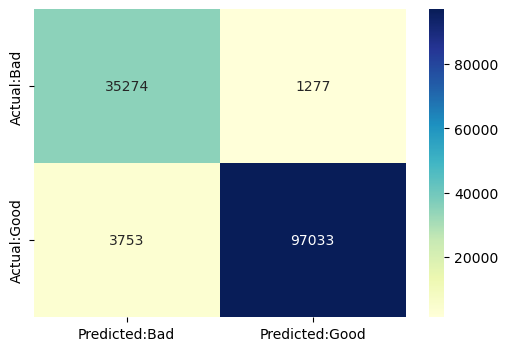

Evaluating SVC...


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define algorithms
algorithms = {
    'Logistic Regression': LogisticRegression(),
    'MultinomialNB': MultinomialNB(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier()
}

# Evaluate each algorithm
for name, algorithm in algorithms.items():
    print(f"Evaluating {name}...")

    # Train the algorithm
    algorithm.fit(trainX, trainY)

    # Calculate accuracy score
    accuracy = algorithm.score(testX, testY)
    Scores_ml[name] = np.round(accuracy, 2)

    # Print training and testing accuracy
    print(f"{name} - Training Accuracy: {algorithm.score(trainX, trainY)}")
    print(f"{name} - Testing Accuracy: {accuracy}")

    # Generate confusion matrix
    con_mat = confusion_matrix(algorithm.predict(testX), testY)
    con_mat_df = pd.DataFrame(con_mat, columns=['Predicted:Bad', 'Predicted:Good'], index=['Actual:Bad', 'Actual:Good'])

    # Print classification report
    print('\nCLASSIFICATION REPORT\n')
    print(classification_report(algorithm.predict(testX), testY, target_names=['Bad', 'Good']))

    # Plot confusion matrix
    print('\nCONFUSION MATRIX')
    plt.figure(figsize=(6, 4))
    sns.heatmap(con_mat_df, annot=True, fmt='d', cmap="YlGnBu")
    plt.show()

In [ ]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())

#code creates a pipeline named pipeline_ls that consists of two main steps:LogisticRegression,CountVectorizer

In [ ]:
trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)

#splits the dataset into training and testing sets for both features (URLs) and labels

In [ ]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [ ]:
pipeline_ls.score(testX,testY)#This code fits the pipeline_ls pipeline to the training data, where trainX contains the URLs and trainY contains the corresponding labels

0.9653043243991059

Training Accuracy : 0.9794543323082748
Testing Accuracy : 0.9653043243991059

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     36862
        Good       0.99      0.96      0.98    100475

    accuracy                           0.97    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.97      0.97    137337


CONFUSION MATRIX


<Axes: >

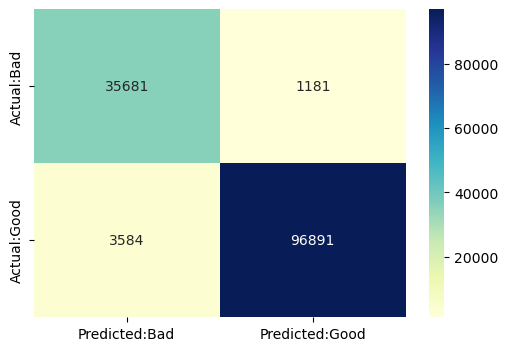

In [ ]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))#prints the training accuracy of the model trained using the pipeline_ls pipeline on the training data (trainX and trainY).
print('Testing Accuracy :',pipeline_ls.score(testX,testY))#print('Testing Accuracy :',pipeline_ls.score(testX,testY))
# creates a DataFrame named con_mat containing the confusion matrix generated by comparing the predicted labels (pipeline_ls.predict(testX)) with the actual labels (testY).
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')#will print a classification report showing metrics
print(classification_report(pipeline_ls.predict(testX), testY,#code prints a classification report showing metrics such as precision, recall, F1-score, and support for each class ('Bad' and 'Good').
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')#prints a header indicating that a confusion matrix is going to be displayed.
plt.figure(figsize= (6,4))#code sets the figure size for the upcoming plot to 6 inches in width and 4 inches in height.
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")#creates a heatmap plot using Seaborn (sns) to visualize the confusion matrix stored in the DataFrame con_mat.